# Data Visualization Exercise

For this exercise, use your creativity and understanding of the different concepts of data visualization.

Create a plot (or a series of subplots) from whatever dataset you choose. As much as possible, please choose a dataset of relevance for visual storytelling. Make the plot using `python`. It doesn't matter if you choose to use `matplotlib` or `seaborn`. 

For the submission:
1. Upload the code that generates the plot to your GitHub repository or to Google Classroom (whichever method you're using for submissions).
2. Upload a png file of the visualization to Google Classroom and write in the Private Comments the caption for the figure you submitted.
3. Make sure to provide the data source in the same folder.

Please make an effort to make it a good and compelling graphic. Choose your colors according to the type of data you're visualizing. Make sure to label everything and avoid clutter. 

As a reference for color choices, you can go to [CARTOColors](https://carto.com/carto-colors/). Simply click on the color map of your choice and it will copy the HEX code of the color.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Source

Edit this cell to place the direct link to your data source.

You may use the datasets you've downloaded for your project as your submission for this assignment. 

In [3]:
# Read in data
data = pd.read_csv("2012 DOT.csv")
data.head
data.shape


(343, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   region              342 non-null    object
 1   province_or_city    337 non-null    object
 2   foreign_travelers   336 non-null    object
 3   overseas_filipino   329 non-null    object
 4   domestic_travelers  336 non-null    object
 5   total_2012          337 non-null    object
dtypes: object(6)
memory usage: 16.2+ KB


In [5]:
data.dtypes

region                object
province_or_city      object
foreign_travelers     object
overseas_filipino     object
domestic_travelers    object
total_2012            object
dtype: object

In [6]:
data.describe()

,region,province_or_city,foreign_travelers,overseas_filipino,domestic_travelers,total_2012
count,342,337,336,329,336,337
unique,22,299,259,90,296,297
top,VII (Central Visayas),Others,-,-,-,0
freq,64,22,31,149,22,19


In [7]:
data.isna().sum()

region                 1
province_or_city       6
foreign_travelers      7
overseas_filipino     14
domestic_travelers     7
total_2012             6
dtype: int64

In [9]:
data1 = data

#Take out the rows that don't have any values by cleaning out the total row. 
#First, removing the extra spaces
data1['total_2012'] = data1['total_2012'].astype(str)
for i in data1['total_2012']:
    data1['total_2012'] = data1['total_2012'].str.strip()

#Removing the 0, - and nan values
data1 = data1.dropna(subset = ['total_2012'])
data1 = data1[data1['total_2012'] != '0']
data1 = data1[data1['total_2012'] != '-']
data1 = data1[data1['total_2012'] != 'nan']

#Removing the Total rows
data1 = data1[data1['region'] != 'Grand Total']
data1 = data1[data1['province_or_city'] != 'Total']

#data1['total_2012'] == '0'
#data1['total_2012'] == 'nan'
#data1.query("total_2012 == '-'")
#data1 = data1['total_2012'].strip
#data2 = data1.dropna() 

In [10]:
#Removing the extra padding on the other columns. All values are currently STR
df_obj = data1.select_dtypes(['object'])
data1[df_obj.columns] = df_obj.apply(lambda x:x.str.strip())
data1['foreign_travelers'] = data1['foreign_travelers'].replace(['-'], '0')
data1['overseas_filipino'] = data1['overseas_filipino'].replace(['-'], '0')
data1['domestic_travelers'] = data1['domestic_travelers'].replace(['-'], '0')
data1['overseas_filipino'].fillna('0', inplace = True)

In [11]:
#Change the datatype to numeric for the appropriate columns 
data2 = data1
data2[["total_2012", "foreign_travelers", "overseas_filipino", "domestic_travelers"]] = data2[["total_2012", "foreign_travelers", "overseas_filipino", "domestic_travelers"]].apply(pd.to_numeric)

data2.dtypes
#data2.isna().sum()

region                object
province_or_city      object
foreign_travelers      int64
overseas_filipino      int64
domestic_travelers     int64
total_2012             int64
dtype: object

In [12]:
data2.shape
data2.describe()

,foreign_travelers,overseas_filipino,domestic_travelers,total_2012
count,2.870000e+02,287.000000,2.870000e+02,2.870000e+02
mean,2.289162e+04,1092.428571,9.695185e+04,1.207437e+05
std,1.111731e+05,4956.777496,2.265950e+05,3.024393e+05
min,0.000000e+00,0.000000,0.000000e+00,2.700000e+01
25%,1.045000e+02,0.000000,1.917500e+03,2.396500e+03
50%,6.470000e+02,0.000000,1.634600e+04,1.809000e+04
75%,5.811500e+03,39.000000,7.464950e+04,8.341700e+04
max,1.513402e+06,42094.000000,2.005609e+06,2.491159e+06


In [96]:
#data2['region'].value_counts()


#Get the columns needed for the visual
data3 = data2.drop(["total_2012","province_or_city"], axis=1)
data3.dtypes
data4 = data3.groupby('region').sum()

data4 = data4.apply(lambda x: x*100/sum(x), axis=1)
OFW = data4['overseas_filipino']
DT = data4['domestic_travelers']
FT = data4['foreign_travelers']

data4

,foreign_travelers,overseas_filipino,domestic_travelers
region,,,
CAR (Cordillera Administrative Region),8.538336,0.406791,91.054873
I (Ilocos Region),5.395021,0.087401,94.517577
II (Cagayan Valley),3.164158,0.000000,96.835842
III (Central Luzon),16.025434,0.466640,83.507926
IV-A (CALABARZON),6.160624,0.403581,93.435795
IV-B (MIMAROPA),18.046388,0.591842,81.361771
IX (Zamboanga Peninsula),6.465642,3.755020,89.779338
NCR (National Capital Region),61.957078,0.820744,37.222178
Region XIII (CARAGA),6.100274,0.394351,93.505375


In [93]:
len(data4.index)

16

#### 

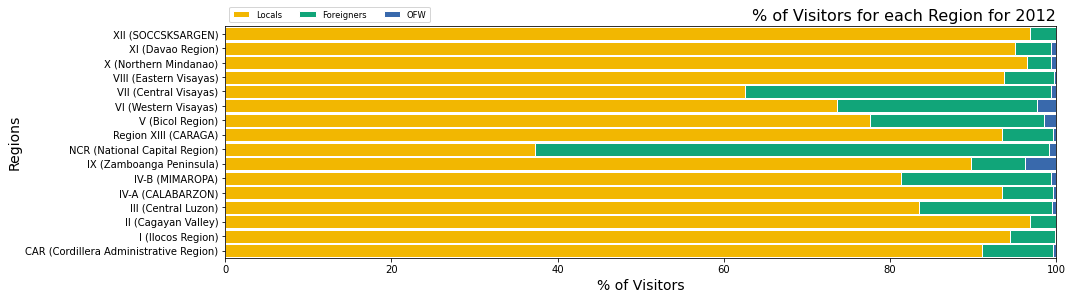

In [153]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)

#ax.barh(DT.index, DT, color='blue', alpha=0.5, label="Locals")
#ax.barh(OFW.index, OFW, color='yellow', alpha=0.5, label="OFW", left = DT)
#ax.barh(FT.index, FT, color='green', alpha=0.5, label="Foreigners", left =DT)
#ax.set_xticks([0, 1])
#ax.legend(fontsize=10);

N = len(data4.index)
r = data4.index

#,#E73F74,#80BA5A,#E68310,#008695,#CF1C90,#f97b72,#4b4b8f,#A5AA99
colors = ['#F2B701', '#11A579', '#3969AC']
labels = ["Locals", "Foreigners", "OFW"]

barWidth = 0.9
lefts = 0
for bars, col, label in zip([DT, FT, OFW], colors, labels):
    plt.barh(r, bars, left=lefts, color=col, edgecolor='white', height=barWidth, label=label)
    lefts += bars
plt.legend()
plt.ylim(-0.5, len(bars) - 0.5)

ax.set_xlabel('% of Visitors', fontsize=14)
ax.set_ylabel('Regions', fontsize=14)
ax.set_xlim([0, 100]) # setting the same limit for both plots
plt.tight_layout() 
ax.legend(ncol=len(labels), bbox_to_anchor=(0                                   
                        ,1),
              loc='lower left', fontsize='small')
ax.set_title('% of Visitors for each Region for 2012', fontsize=16, loc='right' )
plt.show()


In [155]:
#fig = plt.figure(figsize=(8, 5))
#ax = fig.add_subplot(111)
#data4[["overseas_filipino", "domestic_travelers","foreign_travelers"]].plot(kind ="barh", stacked=True)

In [156]:
#stacked_data = data4.apply(lambda x: x*100/sum(x), axis=1)
#stacked_data.plot(kind="barh", stacked=True)
#plt.title("Mince Pie Consumption Breakdown")
#plt.xlabel("Family Member")
#plt.ylabel("Percentage Pies Consumed (%)")


In [ ]:
# Perform your data wrangling and descriptive stats to help

In [154]:
# Visualize your data
fig.savefig('% of Visitors for 2012_Ty_Jose Carlos.png')

Caption: This is a figure about....